In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from data_utils import *

from scipy import stats
import seaborn as sb
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

'''
None || 20000 || 100000
'''
nb = None
nb_trains = nb
nb_valids = nb
nb_tests = nb

In [2]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [3]:
# cd drive/MyDrive/Projects/JPX_Tokyo_Stock/working

#### Load Data

In [4]:
train_df = pd.read_csv('../__input__/1_DataPreprocessing/train_df.csv', parse_dates=['Date'], nrows = nb_trains)
valid_df = pd.read_csv('../__input__/1_DataPreprocessing/valid_df.csv', parse_dates=['Date'], nrows = nb_trains)
test_df = pd.read_csv('../__input__/1_DataPreprocessing/test_df.csv', parse_dates=['Date'], nrows = nb_trains)

snd_train_df = pd.read_csv('../__input__/1_DataPreprocessing/snd_train_df.csv', parse_dates=['Date'], nrows = nb_trains)
snd_valid_df = pd.read_csv('../__input__/1_DataPreprocessing/snd_valid_df.csv', parse_dates=['Date'], nrows = nb_trains)
snd_test_df = pd.read_csv('../__input__/1_DataPreprocessing/snd_test_df.csv', parse_dates=['Date'], nrows = nb_trains)

In [5]:
mini_train = pd.read_csv('../__input__/1_DataPreprocessing/mini_train.csv', parse_dates=['Date'], nrows = nb_trains)
mini_valid = pd.read_csv('../__input__/1_DataPreprocessing/mini_valid.csv', parse_dates=['Date'], nrows = nb_trains)

In [6]:
hidden_test = pd.read_csv('../__input__/jpx-tokyo-stock-exchange-prediction/example_test_files/stock_prices.csv', nrows = nb_tests, parse_dates=['Date'])

In [7]:
hidden_test = DataPreprocessing_for_HiddenTest(hidden_test, mini_valid)

In [8]:
train_df.info(null_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2067600 entries, 0 to 2067599
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Date              2067600 non-null  datetime64[ns]
 1   SecuritiesCode    2067600 non-null  int64         
 2   ExpectedDividend  2067600 non-null  float64       
 3   AdjustmentFactor  2067600 non-null  float64       
 4   SupervisionFlag   2067600 non-null  bool          
 5   Volume            2067600 non-null  int64         
 6   Open              2067600 non-null  float64       
 7   High              2067600 non-null  float64       
 8   Low               2067600 non-null  float64       
 9   Close             2067600 non-null  float64       
 10  Target            2067600 non-null  float64       
 11  CloseT1           2067600 non-null  float64       
 12  CloseT2           2067600 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(9),

In [6]:
valid_df.info(null_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233748 entries, 0 to 233747
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              233748 non-null  datetime64[ns]
 1   SecuritiesCode    233748 non-null  int64         
 2   Volume            233748 non-null  int64         
 3   AdjustmentFactor  233748 non-null  float64       
 4   ExpectedDividend  233748 non-null  float64       
 5   SupervisionFlag   233748 non-null  bool          
 6   Target            233748 non-null  float64       
 7   CloseT2           233748 non-null  float64       
 8   Open              233748 non-null  float64       
 9   High              233748 non-null  float64       
 10  Low               233748 non-null  float64       
 11  Close             233748 non-null  float64       
 12  CloseT1           233748 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(9), int64(2)
memory 

In [7]:
test_df.info(null_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229952 entries, 0 to 229951
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              229952 non-null  datetime64[ns]
 1   SecuritiesCode    229952 non-null  int64         
 2   Volume            229952 non-null  int64         
 3   AdjustmentFactor  229952 non-null  float64       
 4   ExpectedDividend  229952 non-null  float64       
 5   SupervisionFlag   229952 non-null  bool          
 6   Open              229952 non-null  float64       
 7   High              229952 non-null  float64       
 8   Low               229952 non-null  float64       
 9   Close             229952 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(6), int64(2)
memory usage: 16.0 MB


In [8]:
mini_train.info(null_counts= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229952 entries, 0 to 229951
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   SecuritiesCode  229952 non-null  int64         
 1   Date            229952 non-null  datetime64[ns]
 2   CloseT1         229952 non-null  float64       
 3   CloseT2         229952 non-null  float64       
 4   Target          229952 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 8.8 MB


In [9]:
mini_valid.info(null_counts= True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              4000 non-null   datetime64[ns]
 1   SecuritiesCode    4000 non-null   int64         
 2   Volume            4000 non-null   int64         
 3   AdjustmentFactor  4000 non-null   float64       
 4   ExpectedDividend  4000 non-null   float64       
 5   SupervisionFlag   4000 non-null   bool          
 6   Open              4000 non-null   float64       
 7   High              4000 non-null   float64       
 8   Low               4000 non-null   float64       
 9   Close             4000 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(6), int64(2)
memory usage: 316.4 KB


In [10]:
hidden_test.info(null_counts= True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              4000 non-null   datetime64[ns]
 1   SecuritiesCode    4000 non-null   int64         
 2   Volume            4000 non-null   int64         
 3   AdjustmentFactor  4000 non-null   float64       
 4   ExpectedDividend  4000 non-null   float64       
 5   SupervisionFlag   4000 non-null   bool          
 6   Open              4000 non-null   float64       
 7   High              4000 non-null   float64       
 8   Low               4000 non-null   float64       
 9   Close             4000 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(6), int64(2)
memory usage: 316.4 KB


#### EDA

Close

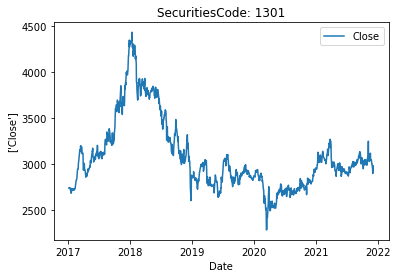

1201


In [12]:
render_col(train_df, 1301, ['Close'])

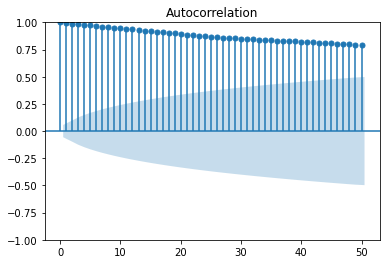

In [13]:
plot_acf(train_df['Close'][train_df['SecuritiesCode']== 1301].reset_index(drop = True), lags=50)
plt.show()

In [14]:
adfuller(train_df['Close'][train_df['SecuritiesCode']== 1301].reset_index(drop = True))


(-1.8957816080113146,
 0.3340481703652849,
 0,
 1200,
 {'1%': -3.435811119579282,
  '5%': -2.8639515467824075,
  '10%': -2.5680539506944444},
 12027.904174348438)

=> Close là 1 biến non-stationaru

Target

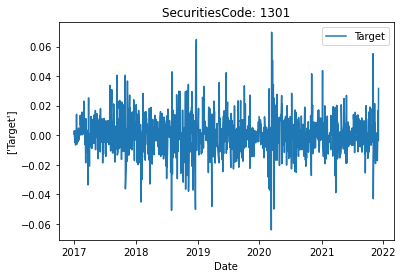

1201


In [15]:
render_col(train_df, 1301, ['Target'])

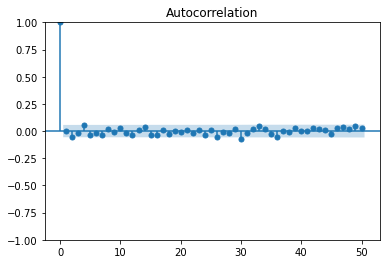

In [16]:
plot_acf(train_df['Target'][train_df['SecuritiesCode']== 1301].reset_index(drop = True), lags=50)
plt.show()

In [17]:
adfuller(train_df['Target'][train_df['SecuritiesCode']== 1301].reset_index(drop = True))


(-25.674870323520157,
 0.0,
 1,
 1199,
 {'1%': -3.4358156841149765,
  '5%': -2.8639535605738278,
  '10%': -2.568055023174024},
 -6889.07950645187)

=> Target là 1 biến stationary
    

Volume

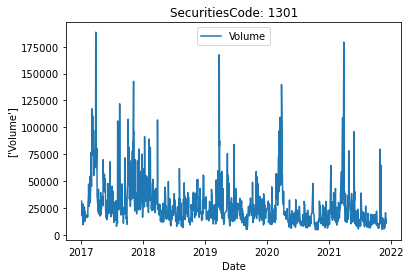

1201


In [18]:
render_col(train_df, 1301, ['Volume'])

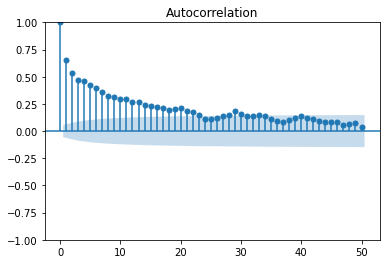

In [19]:
plot_acf(train_df['Volume'][train_df['SecuritiesCode']== 1301].reset_index(drop = True), lags=50)
plt.show()

In [20]:
def compare_gauss_dis(df_series: pd.Series, bins = 60):
    mu = df_series.mean()
    sigma = df_series.std()

    x = np.arange(df_series.min(), df_series.max(), (df_series.max() - df_series.min())/ 500)
    y = [1/np.sqrt(2*np.pi)/sigma*np.exp(-((i-mu)**2)/2/(sigma**2)) for i in x]
    gauss_df = pd.DataFrame({'x':x, 'y':y})

    ax = df_series.hist(bins= bins, density= True)
    gauss_df.plot(x='x', y='y', grid=True, ax=ax)
    plt.legend(['Gaussian fit'])
    plt.xlabel(df_series.name)
    plt.ylabel('Probability Density')
    plt.show()

    stats.probplot(df_series, dist="norm", plot=plt)
    plt.show()


In [21]:
new_vol = np.log(train_df['Volume'][train_df['SecuritiesCode']== 1301].reset_index(drop = True))

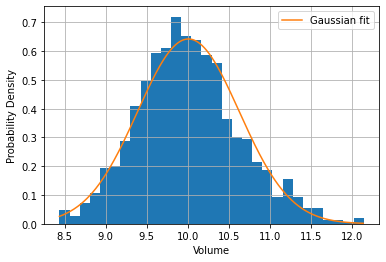

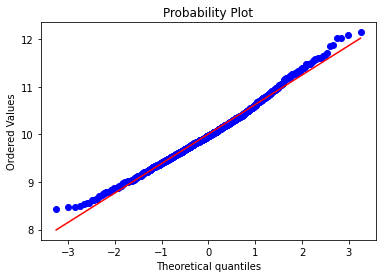

In [22]:
compare_gauss_dis(new_vol, bins = 30)

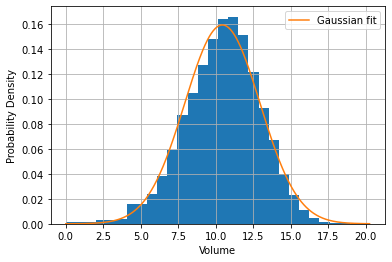

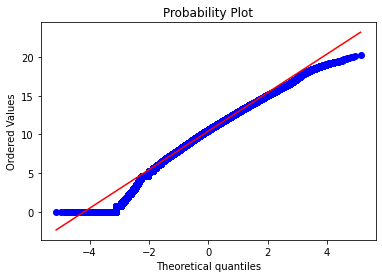

In [23]:
new_vol2 = np.log(train_df['Volume'])
compare_gauss_dis(new_vol2, bins = 30)


In [24]:
adfuller(new_vol)


(-6.3995528715329835,
 2.011303555209138e-08,
 5,
 1195,
 {'1%': -3.4358340188169882,
  '5%': -2.8639616494853217,
  '10%': -2.5680593310691338},
 1390.5182915071432)

In [25]:
adfuller(new_vol2[:100])

(-7.057383756739868,
 5.331692226456342e-10,
 0,
 99,
 {'1%': -3.498198082189098,
  '5%': -2.891208211860468,
  '10%': -2.5825959973472097},
 340.38076521332056)

=> log(Vol) là biến stationary tuân theo phân phối Gauss